In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('./data/36_4_7.xlsx', header=[0, 1])

In [3]:
df.head()

Unnamed: 0_level_0 Unnamed: 1_level_0 Daily ethanol intake (g/kg/day)  \
           Mouse Category            Mouse #                           Day 1   
0  Group-1;Type-A;gradual                  1                        2.428519   
1      Group-2;Type-B;non                  2                        1.634483   
2      Group-2;Type-B;non                  3                        2.842678   
3      Group-2;Type-B;non                  4                        1.602899   
4      Group-2;Type-B;non                  5                        0.405872   

                                Daily total liquid                    ...  \
      Day 2     Day 3     Day 4              Day 1 Day 2 Day 3 Day 4  ...   
0  1.185000  1.273756  0.580301               4.15   2.1  2.35   1.1  ...   
1  0.396416  0.521181  0.051634               2.40   0.7  0.95   0.1  ...   
2  1.433402  2.197984  2.450099               4.30   2.2  3.45   3.9  ...   
3  1.420863  2.268858  0.697453               2.80   2.5  4.15   1.3  ...   
4  0.931023  0.187140  1.706710               0.70   1.7  0.35   3.3  ...   

  Ethanol preference (100*daily ethanol/daily total liquid)             \
                                                      Day 3      Day 4   
0                                          51.086957         19.819820   
1                                          13.768116          1.290323   
2                                          69.000000         78.787879   
3                                          69.166667         21.487603   
4                                           4.794521         44.295302   

  Daily liquid/weight (1000*ml/kg)                                      \
                             Day 1       Day 2       Day 3       Day 4   
0                       209.259259  189.285714  157.804460  185.308848   
1                       435.344828  215.053763  239.583333  253.267974   
2                       238.493724  214.432990  201.612903  196.819085   
3                       210.144928  233.812950  207.612457  205.432937   
4                       326.605505  249.566724  247.038917  243.862520   

  Daily food intake/weight                                
                     Day 1     Day 2     Day 3     Day 4  
0                 5.500000  5.571429  5.454545  5.809683  
1                 9.762931  6.290323  7.239583  6.960784  
2                 6.841004  7.175258  7.379032  7.514911  
3                 5.869565  7.823741  7.006920  9.066214  
4                 5.724771  5.251300  7.563452  7.266776  

[5 rows x 30 columns]

## Pair Plot (Abstract)

In [6]:
daily_ethanol_columns = [('Daily ethanol intake (g/kg/day)', 'Day 1'), ('Daily ethanol intake (g/kg/day)', 'Day 2'), 
                         ('Daily ethanol intake (g/kg/day)', 'Day 3'), ('Daily ethanol intake (g/kg/day)', 'Day 4')]
daily_total_liquid_columns = [('Daily total liquid', 'Day 1'), ('Daily total liquid', 'Day 2'), 
                              ('Daily total liquid', 'Day 3'), ('Daily total liquid', 'Day 4')]
daily_food_intake_columns = [('Daily food intake (g)', 'Day 1'), ('Daily food intake (g)', 'Day 2'), 
                             ('Daily food intake (g)', 'Day 3'), ('Daily food intake (g)', 'Day 4')]
body_weight_columns = [('Body weight (g)', 'Day 1'), ('Body weight (g)', 'Day 2'), 
                       ('Body weight (g)', 'Day 3'), ('Body weight (g)', 'Day 4')]
ethanol_preference_columns = [('Ethanol preference (100*daily ethanol/daily total liquid)', 'Day 1'), ('Ethanol preference (100*daily ethanol/daily total liquid)', 'Day 2'), 
                              ('Ethanol preference (100*daily ethanol/daily total liquid)', 'Day 3'), ('Ethanol preference (100*daily ethanol/daily total liquid)', 'Day 4')]
daily_liquid_weight_columns = [('Daily liquid/weight (1000*ml/kg)', 'Day 1'), ('Daily liquid/weight (1000*ml/kg)', 'Day 2'), 
                               ('Daily liquid/weight (1000*ml/kg)', 'Day 3'), ('Daily liquid/weight (1000*ml/kg)', 'Day 4')]
daily_food_intake_weight_columns = [('Daily food intake/weight', 'Day 1'), ('Daily food intake/weight', 'Day 2'),
                                    ('Daily food intake/weight', 'Day 3'), ('Daily food intake/weight', 'Day 4')]

In [10]:
column_sets = [daily_ethanol_columns, daily_total_liquid_columns, daily_food_intake_columns,
               body_weight_columns, ethanol_preference_columns, daily_liquid_weight_columns,
               daily_food_intake_weight_columns]

num_mice = len(df)
num_time_steps = 4
num_features = 7 

data_3d = np.zeros((num_mice, num_time_steps, num_features))

for i in range(num_mice):
    data_3d[i, :, 0] = df.iloc[i, df.columns.get_loc(daily_ethanol_columns[0]):df.columns.get_loc(daily_ethanol_columns[-1])+1].values
    data_3d[i, :, 1] = df.iloc[i, df.columns.get_loc(daily_total_liquid_columns[0]):df.columns.get_loc(daily_total_liquid_columns[-1])+1].values
    data_3d[i, :, 2] = df.iloc[i, df.columns.get_loc(daily_food_intake_columns[0]):df.columns.get_loc(daily_food_intake_columns[-1])+1].values
    data_3d[i, :, 3] = df.iloc[i, df.columns.get_loc(body_weight_columns[0]):df.columns.get_loc(body_weight_columns[-1])+1].values
    data_3d[i, :, 4] = df.iloc[i, df.columns.get_loc(ethanol_preference_columns[0]):df.columns.get_loc(ethanol_preference_columns[-1])+1].values
    data_3d[i, :, 5] = df.iloc[i, df.columns.get_loc(daily_liquid_weight_columns[0]):df.columns.get_loc(daily_liquid_weight_columns[-1])+1].values
    data_3d[i, :, 6] = df.iloc[i, df.columns.get_loc(daily_food_intake_weight_columns[0]):df.columns.get_loc(daily_food_intake_weight_columns[-1])+1].values
    
for i, sample in enumerate(data_3d):
    print(f"\n Mouse #{i + 1}:")
    for t, time_step in enumerate(sample):
        print(f"Time Step {t + 1}: {time_step}")


 Mouse #1:
Time Step 1: [  2.42851852   4.15         4.95        27.          73.45132743
 209.25925926   5.5       ]
Time Step 2: [  1.185        2.1          5.2         28.          39.62264151
 189.28571429   5.57142857]
Time Step 3: [  1.27375643   2.35         5.3         29.15        51.08695652
 157.80445969   5.45454545]
Time Step 4: [  0.5803005    1.1          5.8         29.95        19.81981982
 185.30884808   5.8096828 ]

 Mouse #2:
Time Step 1: [  1.63448276   2.4          7.55        23.2         23.76237624
 435.34482759   9.76293103]
Time Step 2: [  0.39641577   0.7          5.85        27.9         11.66666667
 215.05376344   6.29032258]
Time Step 3: [  0.52118056   0.95         6.95        28.8         13.76811594
 239.58333333   7.23958333]
Time Step 4: [5.16339869e-02 1.00000000e-01 7.10000000e+00 3.06000000e+01
 1.29032258e+00 2.53267974e+02 6.96078431e+00]

 Mouse #3:
Time Step 1: [  2.84267782   4.3          5.45        23.9         75.43859649
 238.49372385  

## Correlation Heatmap (Abstract)

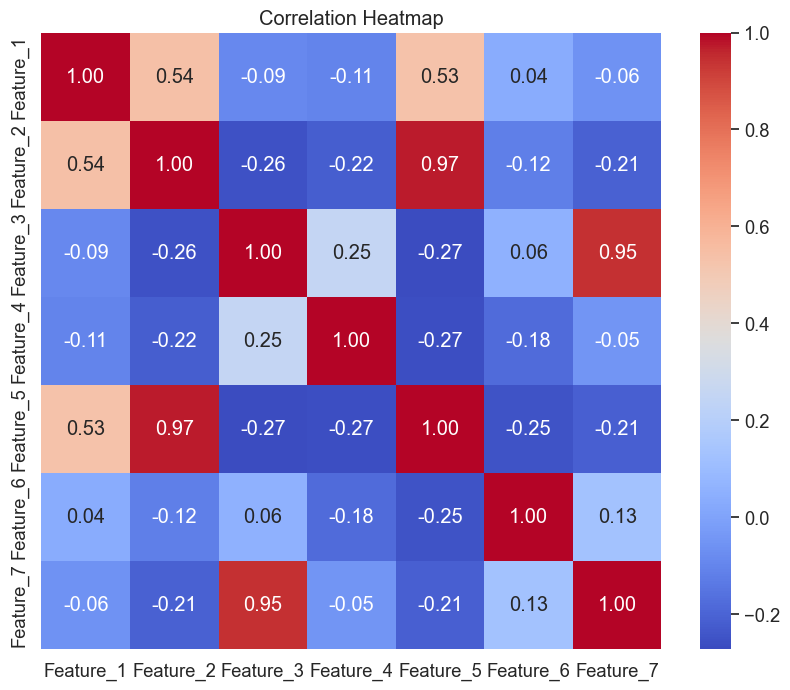

In [ ]:
data_2d = data_3d.reshape(num_mice * num_time_steps, num_features)
columns = [f"Feature_{f+1}" for f in range(num_features)]
df_2d = pd.DataFrame(data_2d, columns=columns)

correlation_matrix = df_2d.corr()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
dataplot = sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Results Interpretation: Training Accuracy vs. Testing Accuracy (Results)

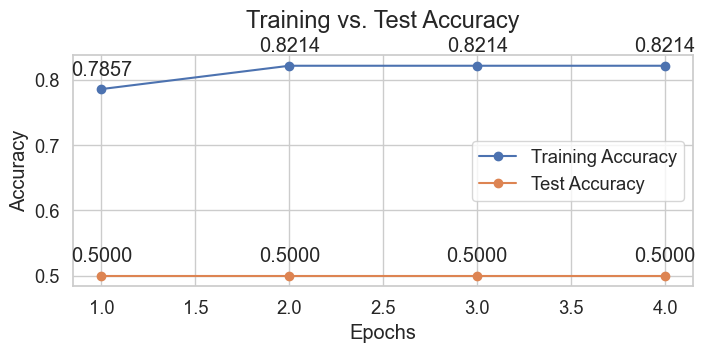

In [ ]:
# results from model evaluation 
epochs = [1, 2, 3, 4]
train_accuracy = [0.7857, 0.8214, 0.8214, 0.8214]
test_accuracy = [0.5, 0.5, 0.5, 0.5]

sns.set_style(style='whitegrid')

plt.figure(figsize=(8, 3))
ax = plt.gca()

ax.plot(epochs, train_accuracy, marker='o', label='Training Accuracy')

ax.plot(epochs, test_accuracy, marker='o', label='Test Accuracy')

for i, acc in enumerate(train_accuracy):
    ax.annotate(f"{acc:.4f}", (epochs[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

for i, acc in enumerate(test_accuracy):
    ax.annotate(f"{acc:.4f}", (epochs[i], acc), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy', pad=20, size=17)
plt.legend()

plt.show()
